In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [28]:
df = pd.read_excel("Clustering+with+SAP+Data/Invoice Data 1.xlsx")

In [29]:
df.head()

,Bill. Doc.,Sold-To Pt,Billing Date,SOrg.,Material,Net Value,Curr.
0,90536365,100017850,2019-12-01,9500,85123A,15.30,EUR
1,90536365,100017850,2019-12-01,9500,71053,20.34,EUR
2,90536365,100017850,2019-12-01,9500,84406B,22.00,EUR
3,90536365,100017850,2019-12-01,9500,84029G,20.34,EUR
4,90536365,100017850,2019-12-01,9500,84029E,20.34,EUR


In [30]:
#df.rename({"Bill. Doc.":"InvoiceNO"},axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Bill. Doc.    397924 non-null  int64         
 1   Sold-To Pt    397924 non-null  int64         
 2   Billing Date  397924 non-null  datetime64[ns]
 3   SOrg.         397924 non-null  int64         
 4   Material      397924 non-null  object        
 5   Net Value     397924 non-null  float64       
 6   Curr.         397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 21.3+ MB


In [32]:
df.columns = ["InvoiceNo", "CustomerID","InvoiceDate","SalesOrg","Material", "NetValue", "Currency"]

In [33]:
df.head()

,InvoiceNo,CustomerID,InvoiceDate,SalesOrg,Material,NetValue,Currency
0,90536365,100017850,2019-12-01,9500,85123A,15.30,EUR
1,90536365,100017850,2019-12-01,9500,71053,20.34,EUR
2,90536365,100017850,2019-12-01,9500,84406B,22.00,EUR
3,90536365,100017850,2019-12-01,9500,84029G,20.34,EUR
4,90536365,100017850,2019-12-01,9500,84029E,20.34,EUR


In [34]:
df['Currency'].unique()

array(['EUR'], dtype=object)

In [35]:
df.drop(columns=["SalesOrg","Currency"],inplace=True)

In [36]:
from datetime import timedelta

snapshot_date = df["InvoiceDate"].max() + timedelta(days=1)

In [37]:
# Recency  = Snapshotdate - late order date

In [41]:
data_process = df.groupby(["CustomerID"]).agg({"InvoiceDate": (lambda x : (snapshot_date-x.max()).days), "InvoiceNo":'nunique',"NetValue" :"sum"})

In [42]:
data_process.columns = ['Recency', 'Frequency', 'MonetaryValue']

In [48]:
data_process['MonetaryValue'] = data_process['MonetaryValue'] + 0.000000001 #for the zero values
recency_log = np.log(data_process['Recency'])
frequency_log = np.log(data_process['Frequency'])
monetary_log = np.log(data_process['MonetaryValue'])

In [49]:
data_process_log = pd.DataFrame({"Recency":recency_log,
                                "Frequency":frequency_log,
                                "Monetary Value":monetary_log,
                                })
data_process_log.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
100012346,5.789960,0.000000,11.253942
100012347,1.098612,1.945910,8.368693
100012348,4.330733,1.386294,7.494007
100012349,2.944439,0.000000,7.471676
100012350,5.743003,0.000000,5.812338


In [50]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(data_process_log)

data_process_norm = scalar.transform(data_process_log)

final_df = pd.DataFrame(data_process_norm)

In [51]:
final_df.head()

,0,1,2
0,1.437375,-1.048362,3.518708
1,-1.953000,1.111943,1.344504
2,0.382811,0.490670,0.685377
3,-0.619046,-1.048362,0.668549
4,1.403440,-1.048362,-0.581860


In [53]:
final_df.describe().round(2)

,0,1,2
count,4339.00,4339.00,4339.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.75,-1.05,-20.58
25%,-0.66,-1.05,-0.65
50%,0.09,-0.28,-0.05
75%,0.84,0.74,0.63
max,1.54,4.89,4.49


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

<Axes: >

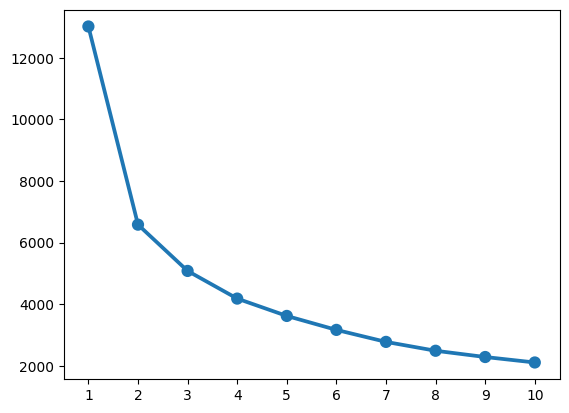

In [58]:
from sklearn.cluster import KMeans

k= [i for i in range(1,11)]
error = []

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(final_df)
    error.append(kmeans.inertia_)


sns.pointplot(x=k,y=error)

In [ ]:
sns.catplot()